# 充填率と各目的変数 (m, kappa)の相関関係
### Diffusivity 拡散係数 m
拡散係数は、粒子（分子やイオンなど）がランダム運動によってどれだけ速く拡散するかを示す物理量 <br>
多孔質材料中では、空隙（pore）構造の複雑さがこの拡散のしやすさを決定する <br>
 - 高い diffusivity ＝ 粒子がスムーズに移動できる構造
 - 低い diffusivity ＝ 粒子が閉じ込められやすい構造

### Permeability 透過率 kappa
透過率は、圧力差を与えたときに流体がどれだけ通り抜けやすいかを表す指標 <br> 
多孔質体を通過する流体の流れやすさ（flow conductance）を定量化 <br>
 - 高い permeability ＝ 液体や気体がよく通るスポンジのような構造
 - 低い permeability ＝ 液体がほとんど通らない緻密な構造

In [2]:
# ---ライブラリのインポート ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# --- npyファイルの読み込み ---
# train以外の場合、適宜変更すること
FR_PATH = "/mnt/c/Users/onion/Documents/analysis/FR_train.npy"
M_PATH = "/mnt/c/Users/onion/Documents/analysis/m_train.npy"
KAPPA_PATH = "/mnt/c/Users/onion/Documents/analysis/kappa_train.npy"

filling_rate = np.load(FR_PATH).ravel()
m = np.load(M_PATH).ravel()
kappa = np.load(KAPPA_PATH).ravel()

data = {
    "m": m,
    "kappa": kappa,
    "filling_rate": filling_rate
}

df = pd.DataFrame(data)

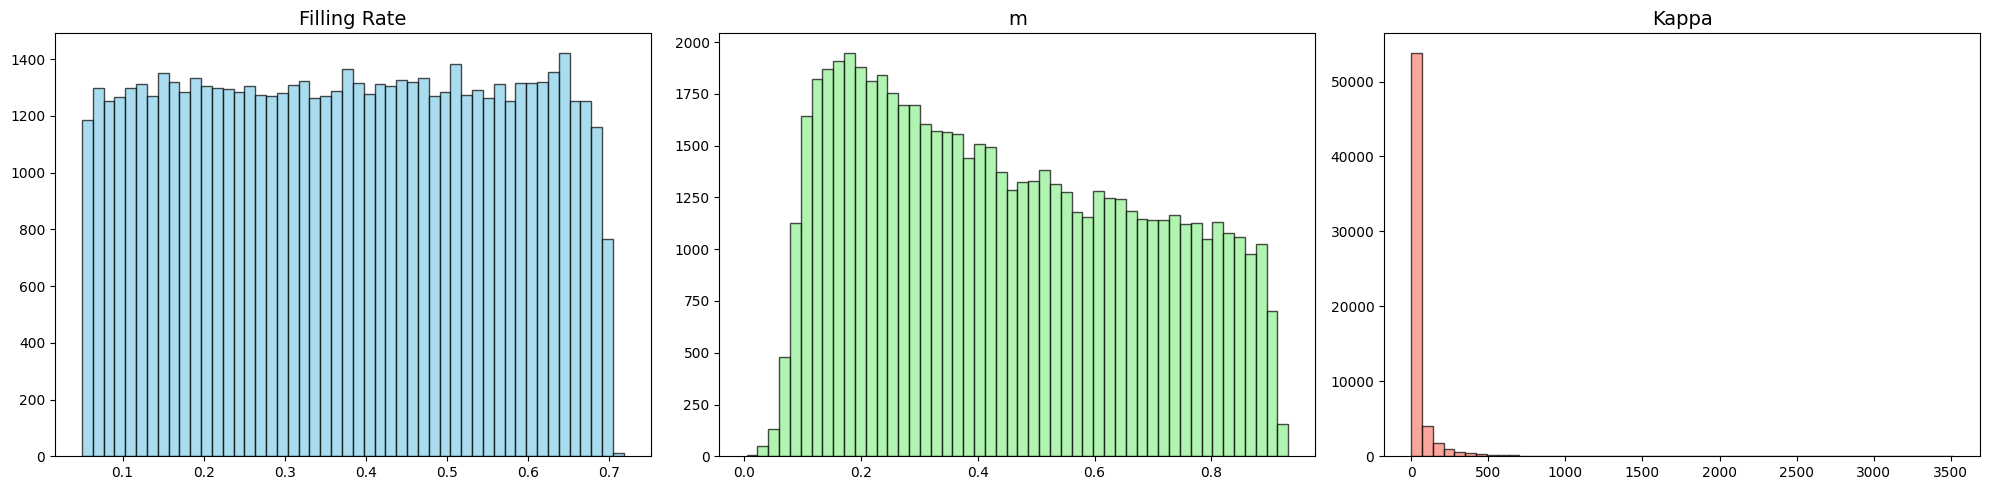

In [4]:
# --- m, kappa, filling_rateのヒストグラム ---
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(filling_rate, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax2.hist(m, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.hist(kappa, bins=50, color='salmon', edgecolor='black', alpha=0.7)

ax1.set_title("Filling Rate", fontsize=14)
ax2.set_title("m", fontsize=14)
ax3.set_title("Kappa", fontsize=14)

plt.tight_layout()
plt.show()

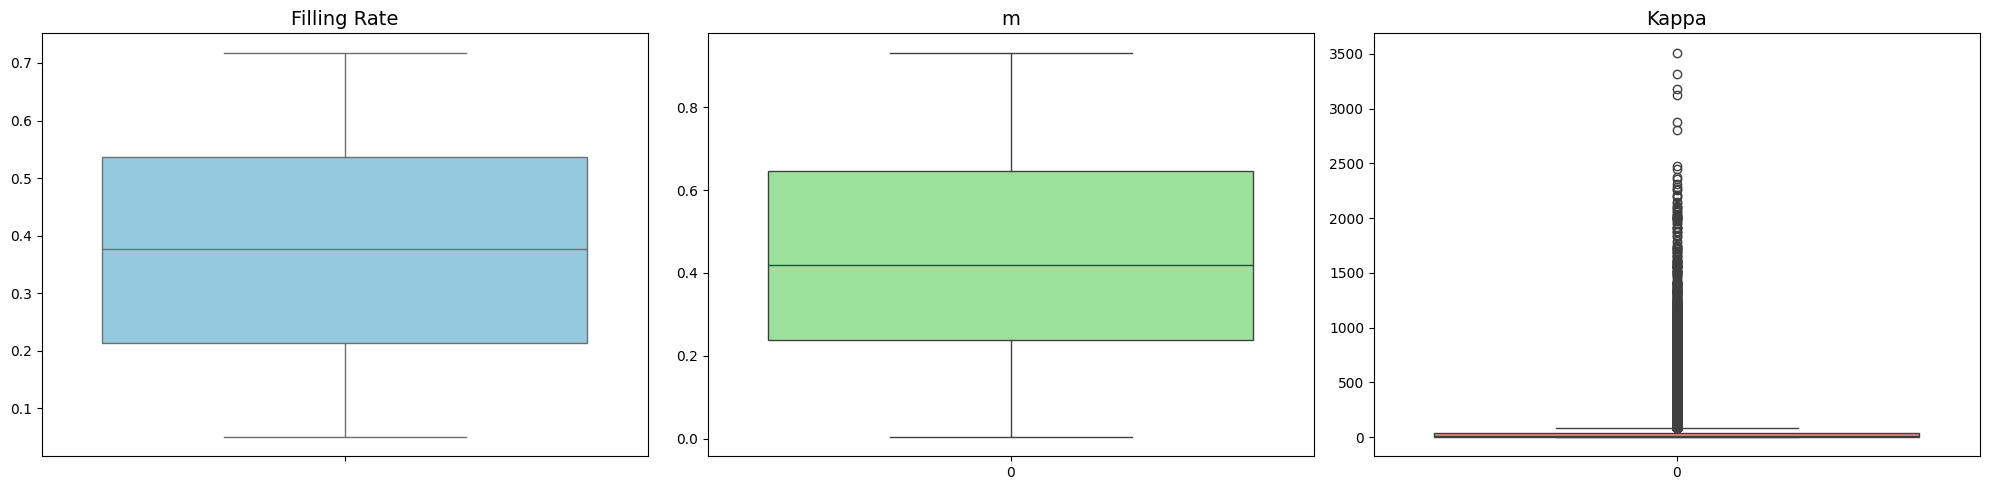

In [5]:
# --- m, kappa, filling_rateの箱ひげ図 ---
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.boxplot(filling_rate, ax=ax1, color='skyblue')
sns.boxplot(m, ax=ax2, color='lightgreen')
sns.boxplot(kappa, ax=ax3, color='salmon')

ax1.set_title("Filling Rate", fontsize=14)
ax2.set_title("m", fontsize=14)
ax3.set_title("Kappa", fontsize=14)

plt.tight_layout()
plt.show()

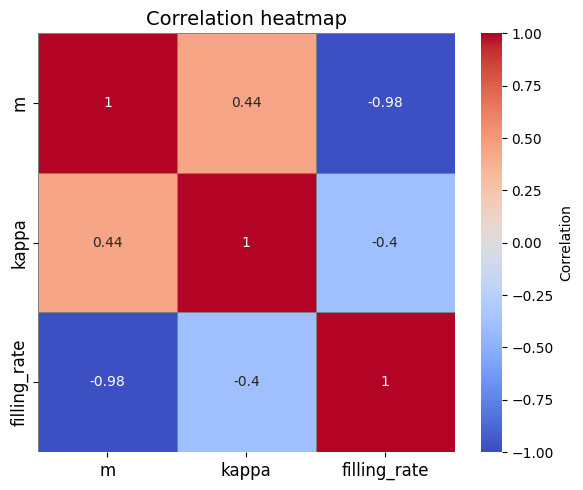

In [6]:
# --- m, kappa, filling_rateの相関関係 ---
corr = df.corr()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_title("Correlation heatmap", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray', cbar_kws={"label": "Correlation"})

plt.tight_layout()
plt.show()

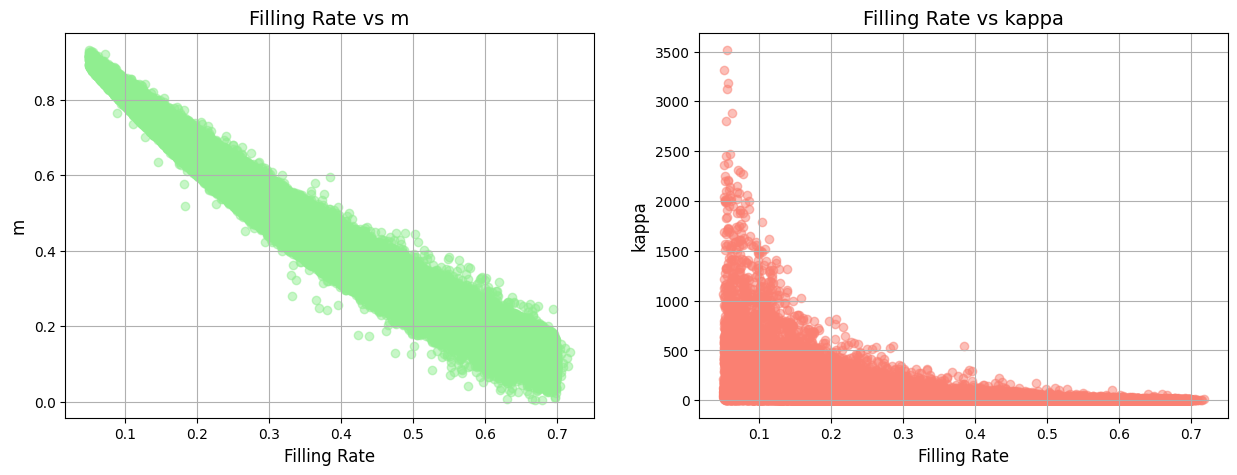

In [7]:
# --- filling_rateとmの散布図, filling_rateとkappaの散布図---
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(filling_rate, m, alpha=0.5, color='lightgreen')
ax2.scatter(filling_rate, kappa, alpha=0.5, color='salmon')

ax1.set_title("Filling Rate vs m", fontsize=14)
ax2.set_title("Filling Rate vs kappa", fontsize=14)

ax1.set_xlabel("Filling Rate", fontsize=12)
ax1.set_ylabel("m", fontsize=12)
ax2.set_xlabel("Filling Rate", fontsize=12)
ax2.set_ylabel("kappa", fontsize=12)

ax1.grid(True)
ax2.grid(True)


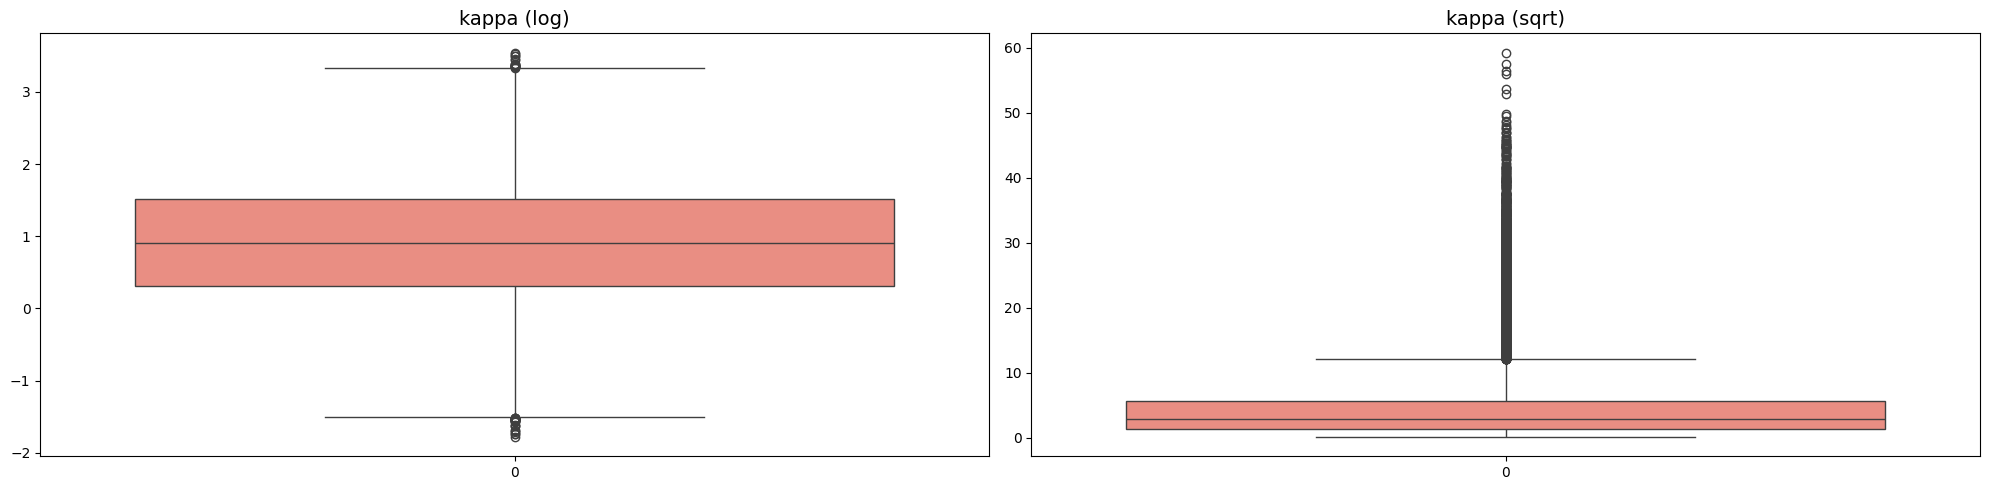

In [8]:
# --- kappaの前処理模索 ---
log_kappa = np.log10(kappa)
sqrt_kappa = np.sqrt(kappa)

df['log_kappa'] = np.log10(df['kappa'])
df['sqrt_kappa'] = np.sqrt(df['kappa'])

# log_kappaとsqrt_kappaのヒストグラム
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(log_kappa, ax=ax1, color='salmon')
sns.boxplot(sqrt_kappa, ax=ax2, color='salmon')

ax1.set_title("kappa (log)", fontsize=14)
ax2.set_title("kappa (sqrt)", fontsize=14)

plt.tight_layout()
plt.show()

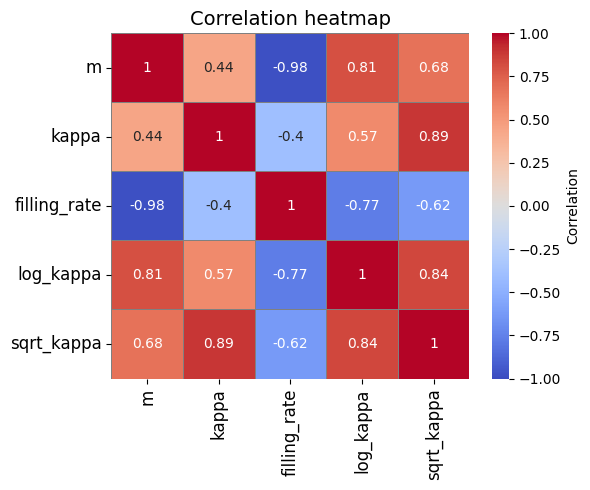

In [9]:
# --- m, kappa,log_kappa, sqrt_kappa, filling_rateの相関関係 ---
corr = df.corr()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_title("Correlation heatmap", fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='gray', cbar_kws={"label": "Correlation"})

plt.tight_layout()
plt.show()

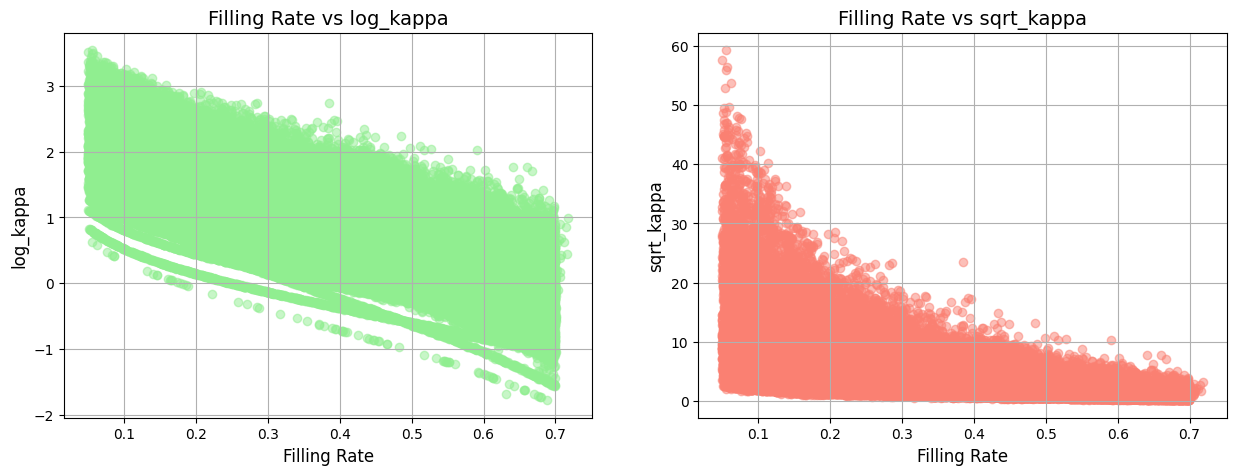

In [10]:
# --- filling_rateとlog_kappaの散布図, filling_rateとsqrt_kappaの散布図---
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(filling_rate, log_kappa, alpha=0.5, color='lightgreen')
ax2.scatter(filling_rate, sqrt_kappa, alpha=0.5, color='salmon')

ax1.set_title("Filling Rate vs log_kappa", fontsize=14)
ax2.set_title("Filling Rate vs sqrt_kappa", fontsize=14)

ax1.set_xlabel("Filling Rate", fontsize=12)
ax1.set_ylabel("log_kappa", fontsize=12)
ax2.set_xlabel("Filling Rate", fontsize=12)
ax2.set_ylabel("sqrt_kappa", fontsize=12)

ax1.grid(True)
ax2.grid(True)